In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# New Section

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape

(60000, 28, 28)

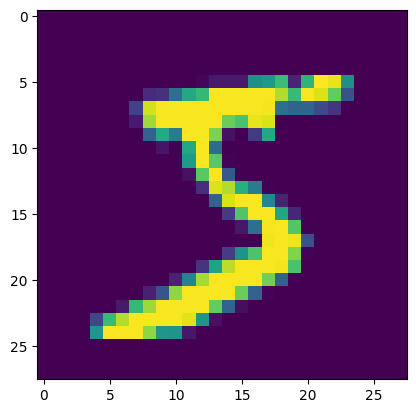

In [ ]:
plt.imshow(X_train[0])

In [ ]:
#Convert into Vector
X_train=X_train.reshape(X_train.shape[0],28*28)
X_test=X_test.reshape(X_test.shape[0],28*28)
X_train.shape

(60000, 784)

In [ ]:
X_train.max()

255

In [ ]:
X_train= X_train / 255.0
X_test= X_test / 255.0
X_train.max()

1.0

# Model


In [ ]:
input_layer=Input(shape= (X_train.shape[1]))
bottleneck=Dense(32,activation='relu',name='bottleneck')(input_layer)
output=Dense(X_train.shape[1],activation='sigmoid',name='output')(bottleneck)

In [ ]:
Auto_encoder=Model(input_layer,output)
Auto_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoder=Model(input_layer,bottleneck)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
decoder=Model(bottleneck,output)
decoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 25872 (101.06 KB)
Trainable params: 25872 (101.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Auto_encoder.compile(loss='mse',optimizer='adam')
history=Auto_encoder.fit(X_train,X_train,epochs=50,batch_size=64)

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0411
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0179
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0130
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0114
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0109
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0107
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0106
Epoch 8/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0105
Epoch 9/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0104
Epoch 10/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0104
Epoch 11/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0103
Epoch 12/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0103
Epoch 13/50
938/938 [====

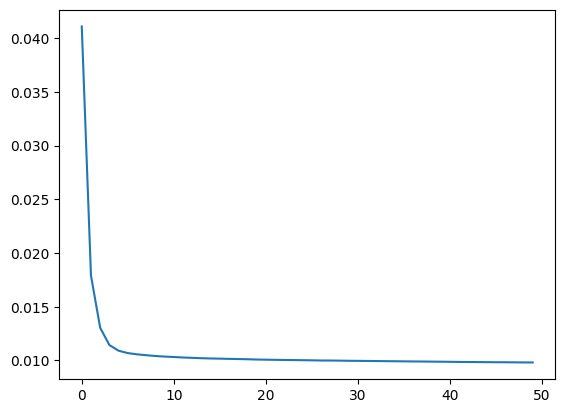

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
encoded_data=encoder.predict(X_test,batch_size=512)
encoded_data.shape

20/20 [==============================] - 0s 5ms/step


(10000, 32)

In [ ]:
output_data=decoder.predict(encoded_data,batch_size=512)
output_data.shape

20/20 [==============================] - 0s 6ms/step


(10000, 784)

In [ ]:
output_data=output_data.reshape(output_data.shape[0],28,28)
output_data.shape

(10000, 28, 28)

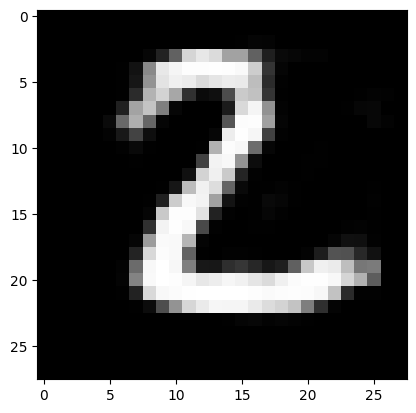

In [ ]:
plt.imshow(output_data[1],cmap='gray')

In [ ]:
X_test=X_test.reshape(10000,28,28)
X_test.shape


(10000, 28, 28)

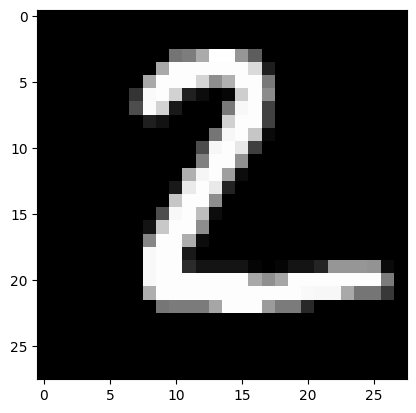

In [ ]:
plt.imshow(X_test[1],cmap='gray')